# Entregável 1 - visão computacional

In [1]:
%matplotlib inline
import cv2
from matplotlib import pyplot as plt
import numpy as np
import time as t
print("OpenCV Version : %s " % cv2.__version__)

OpenCV Version : 3.4.1 


# Equalização de histograma

In [2]:
rintin = cvrintin = cv2.imread("RinTinTin.jpg")
#imagem_gray

In [3]:
rintin.shape

(240, 320, 3)

In [4]:
rintin_gray = cv2.cvtColor(rintin, cv2.COLOR_RGB2GRAY)

In [5]:
rintin_gray.shape

(240, 320)

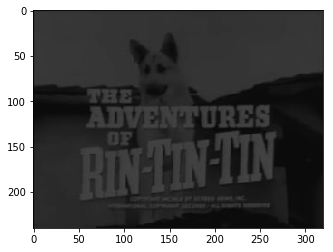

In [6]:
plt.imshow(rintin_gray, cmap="Greys_r", vmin=0, vmax=255)

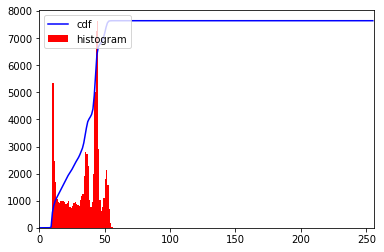

In [7]:

hist,bins = np.histogram(rintin_gray.flatten(),256,[0,256])

cdf = hist.cumsum()
cdf_normalized = cdf * hist.max()/ cdf.max()

plt.plot(cdf_normalized, color = 'b')
plt.hist(rintin_gray.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()

## Atividade 1

Realize as seguintes atividades:

1. O histograma fornecido aproveita bem as faixas de cores?
2. Crie uma imagem derivada da imagem fornecida que use melhor a faixa dinâmica, ou seja, tenha o valor dos seus pixels distribuídos entre `0` e `255`. 
3. Plote a imagem pedida

In [8]:
minimo= np.amin(rintin_gray)
maximo= np.amax(rintin_gray)

print("O histograma não aproveita bem as faixas de cores, pois seus valores no eixo X estão concentrados entre {} e {}, quando idealmente deveriam variar entre 0 e 255".format(minimo,maximo))

O histograma não aproveita bem as faixas de cores, pois seus valores no eixo X estão concentrados entre 8 e 58, quando idealmente deveriam variar entre 0 e 255


Para o melhor aproveitamento das faixas de cores é necessário realizar a equalização do histograma.

Idealmente, o histograma começaria no zero do eixo X. Como o valor inicial do histograma apresentado é 8, é necessário subtrair tal número de cada pixel, trazendo o gráfico para a esquerda. Além disso, os dados devem se adequar a uma nova reta, mais abrangente, que varia entre 0 e 255px. Para isso, deve ser considerado um fator de adequação, para o qual cada pixel deve ser multiplicado.

In [9]:
fator=255/(58-8)
print("O fator de multiplicação para a equalização do histograma é: ", fator)

O fator de multiplicação para a equalização do histograma é:  5.1


In [10]:
rintin_gray = cv2.cvtColor(rintin, cv2.COLOR_RGB2GRAY)
for i in range(rintin_gray.shape[0]):
    for j in range(rintin_gray.shape[1]):    # criando um loop que passa pela lista de listas
        rintin_gray[i][j]=(rintin_gray[i][j]-8)*5.1   # De cada elemento subtrai-se 8 e multiplica-se o resultado por 5.1
        

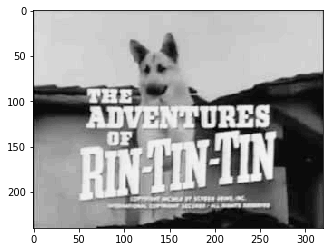

In [11]:
plt.imshow(rintin_gray, cmap="Greys_r", vmin=0, vmax=255)

## Atividade 2

Leia com a OpenCV a figura abaixo:

![](cena_canto_sala.jpg)

Separe os canais  R e B das imagens e analise seus histogramas.

1. A partir dos canais R e B e da análise do histograma é possível identificar a caixa vermelha e o creeper azul?

1. Crie uma imagem numpy em que somente os pixels da caixa vermelha estão brancos e faça seu plot aqui. Você vai precisar usar manipulação de canais RGB. Use o [ExemploFor.ipynb](ExemploFor.ipynb) .


In [12]:
sala = cv2.imread("cena_canto_sala.jpg")

In [13]:
sala.shape

(605, 807, 3)

In [14]:
sala = cv2.cvtColor(sala, cv2.COLOR_BGR2RGB)



## Canal R

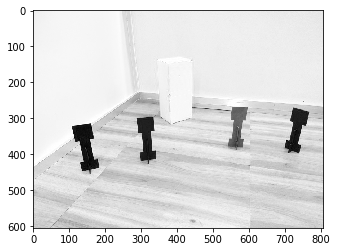

In [15]:
sala_red =  sala[:,:,0] 
plt.imshow(sala_red, cmap="Greys_r", vmin=0, vmax=255) 

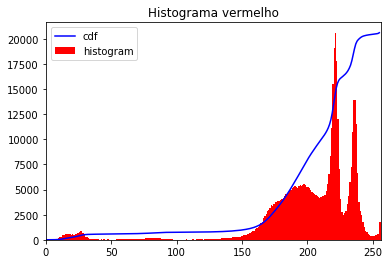

In [16]:
hist,bins = np.histogram(sala_red.flatten(),256,[0,256])

cdf = hist.cumsum()
cdf_normalized = cdf * hist.max()/ cdf.max()

plt.plot(cdf_normalized, color = 'b')
plt.hist(sala_red.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
#plt.ylim([0,10000])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.title("Histograma vermelho")

plt.show()

A partir do canal R e da análise do histograma é possível identificar os objetos em que a cor vermelha é forte ou fraca. A caixa está em branco, ou seja, a cor vermelha é predominante, o que condiz com a imagem colorida em que o objeto é laranja. Na curva do histograma, a caixa está, portanto, localizada em um pico. Já o creeper azul aparece em preto na figura, o que indica a ausência quase total da cor vermelha. No histograma, ele é representado por um ponto mais baixo.

### Canal G

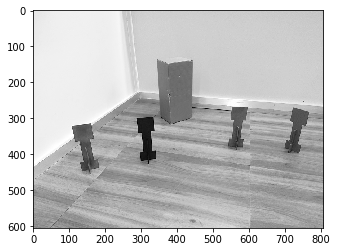

In [17]:
sala_g =  sala[:,:,1] 
plt.imshow(sala_g, cmap="Greys_r", vmin=0, vmax=255)

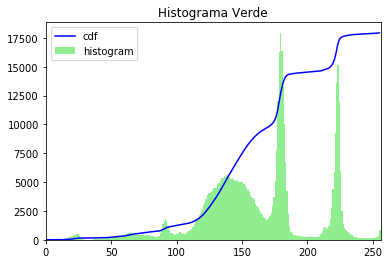

In [18]:

hist,bins = np.histogram(sala_g.flatten(),256,[0,256])

cdf = hist.cumsum()
cdf_normalized = cdf * hist.max()/ cdf.max()

plt.plot(cdf_normalized, color = 'b')
plt.hist(sala_g.flatten(),256,[0,256], color = 'lightgreen')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.title("Histograma Verde")
plt.show()

## Canal B (Azul)

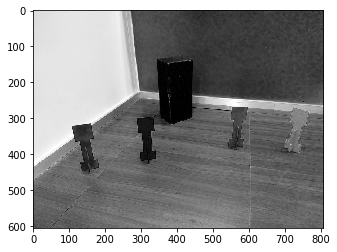

In [19]:
sala_b =  sala[:,:,2] 
plt.imshow(sala_b, cmap="Greys_r", vmin=0, vmax=255)

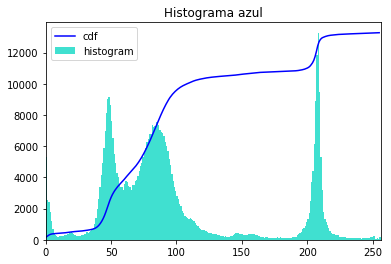

In [20]:
hist,bins =np.histogram(sala_b.flatten(),256,[0,256])

cdf = hist.cumsum()
cdf_normalized = cdf * hist.max()/ cdf.max()

plt.plot(cdf_normalized, color = 'b')
plt.hist(sala_b.flatten(),256,[0,256], color = 'turquoise')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.title("Histograma azul")

plt.show()

A partir do canal B e da análise do histograma é possível identificar os objetos em que a cor azul é forte ou fraca. A caixa  aparece escura, ou seja, a cor azul não é predominante. Na curva do histograma, a caixa está, portanto, localizada em um um ponto mais baixo. Já o creeper azul aparece claro na figura, o que indica a presença significativa da cor azul. No histograma, ele é representado por um pico.

## Caixa em branco

In [21]:
imagem_gray = cv2.cvtColor(sala, cv2.COLOR_BGR2GRAY)

saida = imagem_gray.copy()


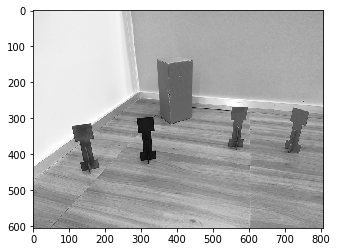

In [22]:
plt.imshow(saida, cmap="Greys_r", vmin=0, vmax=255)

Podemos zerar a imagem para usar como saída

In [23]:
saida[:] = 0

Note que, depois de zerar, vemos a imagem toda como preto

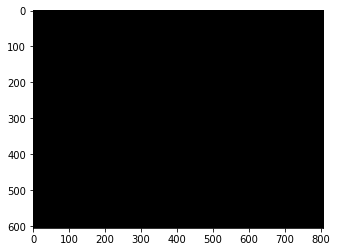

In [24]:
plt.imshow(saida, cmap="Greys_r", vmin=0, vmax=255)

In [25]:
sala = cv2.imread("cena_canto_sala.jpg")

In [26]:
saida = np.zeros((sala.shape[0],sala.shape[1]), dtype=np.uint8)

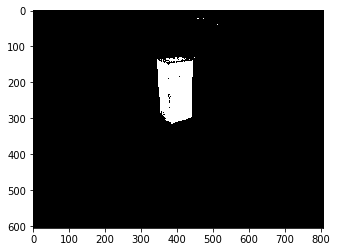

In [27]:
sala_br = cv2.cvtColor(sala, cv2.COLOR_BGR2RGB)

for i in range(sala_br.shape[0]):
    for j in range(sala_br.shape[1]):
            cor=sala_br[i][j]
            #if cor[0]>=230 and cor[2]<=220 and cor[2]>210 and cor[1]<=220 and cor[1]>200:
            if cor[0]>=190 and cor[2]<35 and cor[1]<=130 and cor[1]>70: #Caixa
                saida[i][j]=255
                
            elif cor[0]>=200 and cor[2]<42 and cor[1]>182: #Tampa
                saida[i][j]=255
                    
            else:
                saida[i][j]=0

plt.imshow(saida, cmap="Greys_r", vmin=0 , vmax=255)

# Atividade 3


Abra a imagem `hall_box_battery_atividade3.png`  e a converta para tons de cinza de `0` a `255`.

Forneça como saída uma uma cópia da imagem  em que cada pixel  recebe o módulo da subtração entre o pixel que vem depois e o que vem antes dele (na horizontal).

Obs.: O conceito de *antes* e *depois* pode ser na horizontal ou na vertical

Apresente a imagem resultado, deve ficar parecida com a imagem `gabarito_atividade_3.png`.

<img src="gabarito_atividade_3.png" width=400>

In [28]:
img = cv2.imread("hall_box_battery_atividade3.png")

imagem_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

saida = imagem_gray.copy()



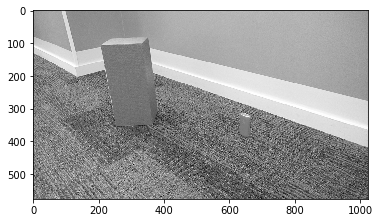

In [29]:
plt.imshow(saida, cmap="Greys_r")#, vmin=0, vmax=255)

In [30]:
saida.shape

(576, 1024)

In [31]:
#saida = np.zeros((576, 1024), dtype=np.uint8)
saida[:] = 0


for i in range(imagem_gray.shape[0]-1):
    for j in range(imagem_gray.shape[1]-1):
        saida[i][j] = abs(int(imagem_gray[i+1][j])-int(imagem_gray[i-1][j]))

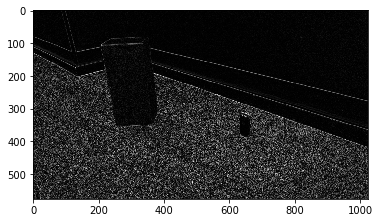

In [32]:
plt.imshow(saida, cmap='Greys_r')